<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/6.%20Week%206/Clustering_Campaign_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Memuat dataset dari URL dengan delimiter tab (\t)
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringcampaign.csv'
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), sep='\t')

# Tampilkan informasi dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#2. Preprocessing Data

In [50]:
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
                'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
                'Z_CostContact', 'Z_Revenue', 'Response']

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Hapus baris yang memiliki nilai hilang
data_cleaned = data[numeric_cols].dropna()

# Standarisasi fitur
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

print("Bentuk data setelah standarisasi:", data_scaled.shape)


Bentuk data setelah standarisasi: (2216, 25)


#2. Membuat Model Clustering


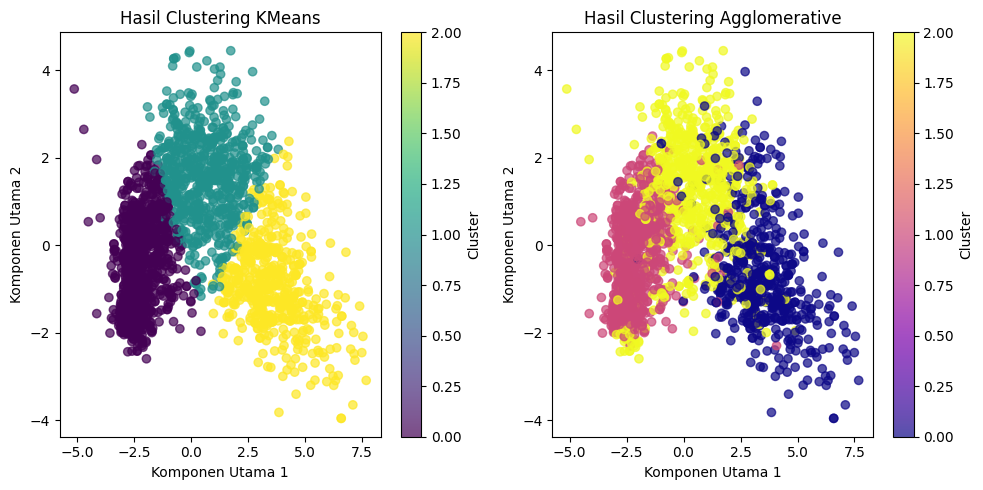

In [55]:
# Contoh model KMeans dengan jumlah klaster yang dipilih misal 3 (optimal bisa dipilih dari analisis di bawah)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(data_scaled)

agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(data_scaled)

pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

# Visualisasi hasil KMeans Clustering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.7)
plt.title("Hasil Clustering KMeans")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.colorbar(label="Cluster")

# Visualisasi hasil Agglomerative Clustering
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_agglo, cmap='plasma', alpha=0.7)
plt.title("Hasil Clustering Agglomerative")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()

#3. Menghitung Matriks Cluster


## Elbow Methode

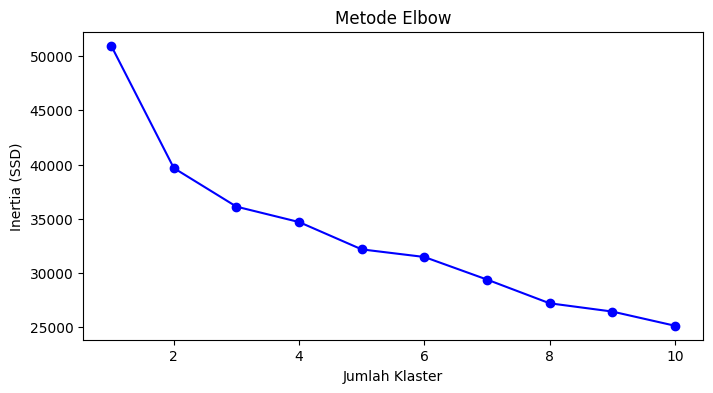

In [44]:
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia (SSD)')
plt.title('Metode Elbow')
plt.show()

## Silhouette Coefficient

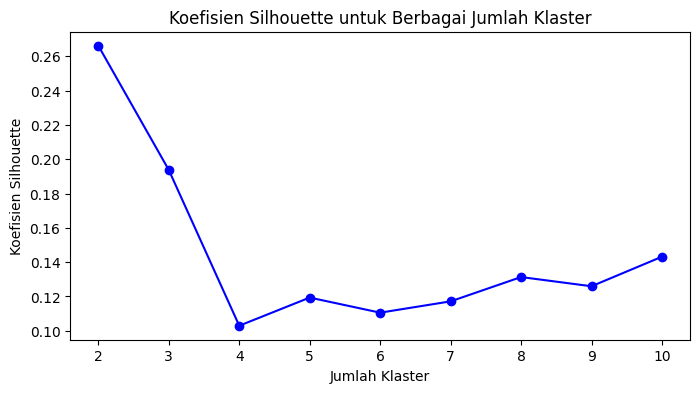

In [45]:
silhouette_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Koefisien Silhouette')
plt.title('Koefisien Silhouette untuk Berbagai Jumlah Klaster')
plt.show()


##Calinski-Harabasz Index

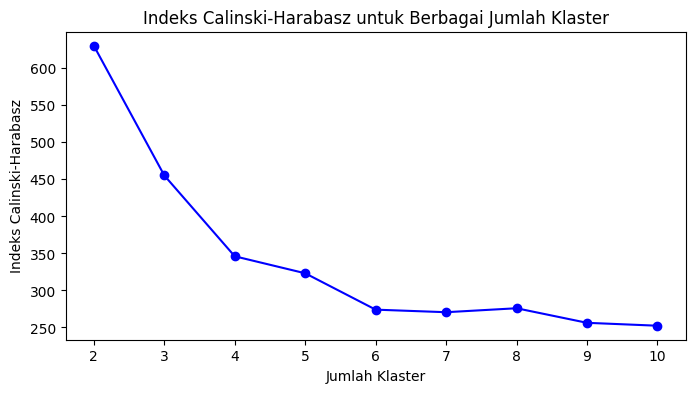

In [46]:
calinski_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data_scaled)
    score = calinski_harabasz_score(data_scaled, labels)
    calinski_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), calinski_scores, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Indeks Calinski-Harabasz')
plt.title('Indeks Calinski-Harabasz untuk Berbagai Jumlah Klaster')
plt.show()


##Dunn Index

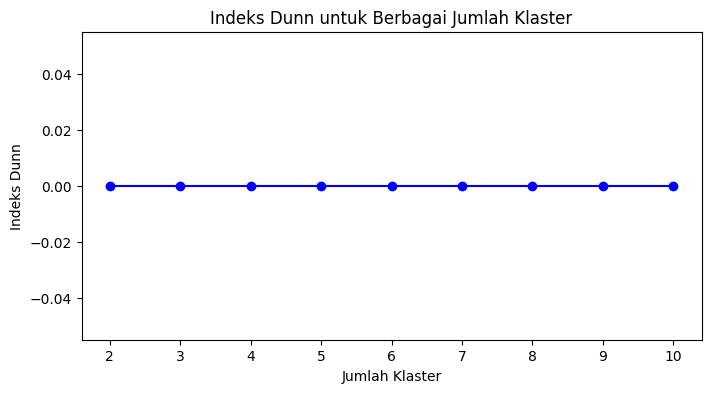

In [47]:
def dunn_index(points, labels):
    unique_clusters = np.unique(labels)
    inter_cluster_distances = []
    intra_cluster_distances = []

    for i in unique_clusters:
        cluster_i = points[labels == i]
        # Hitung jarak antar semua titik di klaster i untuk diameter (intra-cluster distance)
        if len(cluster_i) > 1:
            intra_distance = np.max(pdist(cluster_i))
            intra_cluster_distances.append(intra_distance)
        else:
            intra_cluster_distances.append(0)

        for j in unique_clusters:
            if i < j:
                cluster_j = points[labels == j]
                # Jarak minimum antar titik dari klaster yang berbeda
                inter_distance = np.min(pdist(np.vstack([cluster_i, cluster_j])))
                inter_cluster_distances.append(inter_distance)

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

dunn_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data_scaled)
    dunn = dunn_index(data_scaled, labels)
    dunn_scores.append(dunn)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), dunn_scores, 'bo-')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Indeks Dunn')
plt.title('Indeks Dunn untuk Berbagai Jumlah Klaster')
plt.show()


# Evaluasi Clustering

Berikut adalah beberapa persamaan evaluasi clustering yang digunakan:



## 1. Elbow Methode (SSE)
 Elbow method menghitung nilai inertia untuk berbagai jumlah cluster. Inertia adalah jumlah kuadrat jarak Euclidean antara setiap titik dengan pusat cluster-nya.

Fungsi objektif dalam KMeans didefinisikan sebagai:

$$
\text{Inertia} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

- $(K)$ : jumlah cluster  
- $(C_k)$ : himpunan titik pada cluster ke-\(k\)  
- $(\mu_k)$ : pusat (mean) dari cluster ke-\(k\)

Titik "elbow" yang ditunjukkan pada grafik menunjukkan jumlah cluster yang optimal.

---

## 2. Silhouette Coefficient

Silhouette coefficient mengukur seberapa mirip setiap titik dengan cluster-nya dibandingkan dengan cluster lain. Untuk setiap data $(i)$:

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}}
$$


- **$a(i)$**: jarak rata-rata dari titik $i$ ke semua titik lain dalam cluster yang sama (intra-cluster distance),  
- **$b(i)$**: jarak rata-rata dari titik $i$ ke semua titik pada cluster terdekat yang berbeda (nearest-cluster distance).

Nilai $s(i)$ berkisar dari -1 (cluster yang tidak sesuai) hingga +1 (cluster yang sangat kompak).

Nilai rata-rata silhouette mendekati 1 menunjukkan pemisahan cluster yang baik.

Kelebihan: mudah diinterpretasi dan memberikan insight per titik.

---

## 3. Calinski-Harabasz Index

Indeks ini mengukur seberapa baik cluster yang terbentuk dengan menghitung rasio variansi antar cluster terhadap variansi dalam cluster:

$$
CH = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$

- **$N$**: jumlah total data,  
- **$k$**: jumlah cluster,  
- **Between-Cluster Dispersion**: mengukur jarak antar centroid cluster,  
- **Within-Cluster Dispersion**: mengukur jarak antara titik data dengan centroid cluster masing-masing.

Nilai yang lebih tinggi menunjukkan cluster yang lebih terpisah.

---

## 4. Dunn Index

Dunn Index mendefinisikan kualitas clustering dengan mengambil rasio antara jarak antar cluster minimum dan diameter maksimal di antara setiap cluster:

$$
\text{Dunn} = \frac{\min_{i \neq j} \; \delta(C_i,C_j)}{\max_{1 \leq k \leq K} \; \Delta(C_k)}
$$

- **$\delta(C_i,C_j)$**: jarak minimum antara tiap titik dari cluster $C_i$ dengan tiap titik dari cluster $C_j$,  
- **$\Delta(C_k)$**: diameter cluster $C_k$, yakni jarak maksimum antara dua titik dalam cluster yang sama.

Nilai Dunn Index yang besar menandakan adanya pemisahan antar cluster yang baik dan cluster yang kompak.

---

Metriks Terbaik:
- Elbow Method membantu menentukan jumlah cluster dengan menganalisis perubahan inertia, namun kurang eksplisit dalam memberi batasan untuk cluster yang “baik”.

- Silhouette Coefficient sangat populer karena mengkombinasikan informasi intra- dan inter-cluster serta mudah diinterpretasi.

- Calinski-Harabasz Index juga banyak digunakan karena sederhana dan cepat.

- Dunn Index memberikan gambaran yang sangat jelas mengenai pemisahan dan kompaksi cluster, tetapi terkadang sulit untuk dihitung pada dataset besar.

Dalam praktiknya, Silhouette Coefficient sering dijadikan patokan karena memberikan nilai yang relatif mudah dipahami, sementara Calinski-Harabasz Index bisa dipakai sebagai konfirmasi tambahan.

